#**Question 1:** 

## 1.Create a dataset with 1000 samples, using the ‘make_moon’s function of sklearn (choose random_state=42, noise=0.3). Perform appropriate preprocessing,  train and test split of the dataset. Plot the generated dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn import metrics

In [ ]:
x,y=make_moons(n_samples=1000, noise=0.3, random_state=42)

In [ ]:
print(x)

[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]


In [ ]:
data = {'x1': [x[i][0] for i in range(len(x))],
        'x2': [x[i][1] for i in range(len(x))],
        'y':[y[i] for i in range(len(y))]}
df = pd.DataFrame(data)
df

,x1,x2,y
0,-0.171863,0.596249,1
1,1.253283,-0.265414,1
2,0.723224,0.231943,1
3,-0.065198,-0.655194,1
4,-0.799493,0.552935,0
...,...,...,...
995,0.861014,0.343843,0
996,-0.229425,0.754849,0
997,1.770957,-0.509436,1
998,-1.061772,0.006786,0


### preprocessing and visualization

In [ ]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [ ]:
type(df.iloc[4,0])

numpy.float64

In [ ]:
def check_if_float(row):
  l=row.map(type) == float
  c=0
  for i in range(len(l)):
    if(l[i]!=True):
      c+=1
  return c
print(check_if_float(df['x1']))
print(check_if_float(df['x2']))


0
0


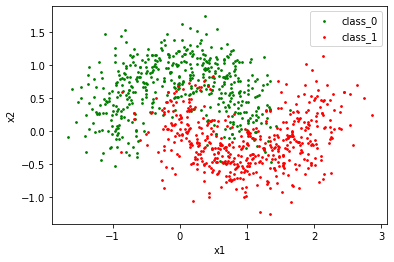

In [ ]:
plt.scatter(df.iloc[:,0][y==0], df.iloc[:,1][y==0], c='green',s=3,label='class_0')
plt.scatter(df.iloc[:,0][y==1], df.iloc[:,1][y==1], c='red',s=3,label='class_1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

Text(0.5, 1.0, 'x2')

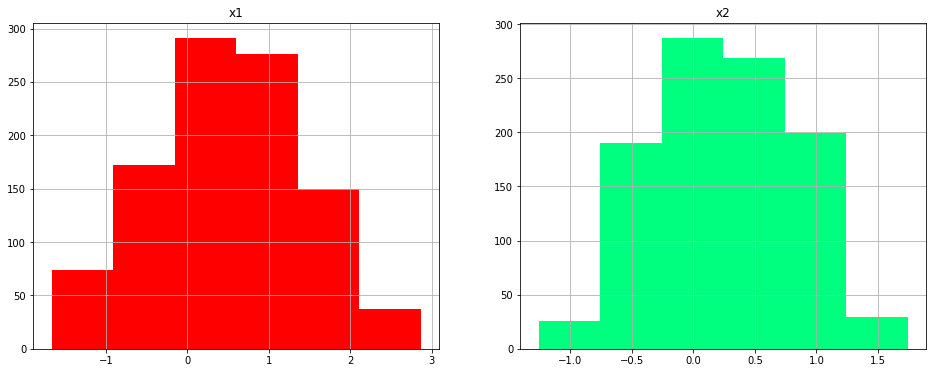

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(16,6))
df['x1'].hist(bins=6,ax=axes[0],color='red')
df['x2'].hist(bins=6,ax=axes[1],color='springgreen')
axes[0].set_title('x1')
axes[1].set_title('x2')

In [ ]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,0.495520,0.241961,0.50000
std,0.917175,0.571628,0.50025
min,-1.669007,-1.257494,0.00000
25%,-0.134887,-0.209607,0.00000
50%,0.502420,0.234512,0.50000
75%,1.127110,0.695783,1.00000
max,2.863928,1.740967,1.00000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,:2]=scaler.fit_transform(df.iloc[:,:2])
df

,x1,x2,y
0,0.330281,0.618231,1
1,0.644679,0.330863,1
2,0.527744,0.496734,1
3,0.353813,0.200870,1
4,0.191821,0.603786,0
...,...,...,...
995,0.558142,0.534053,0
996,0.317583,0.671125,0
997,0.758882,0.249481,1
998,0.133961,0.421643,0


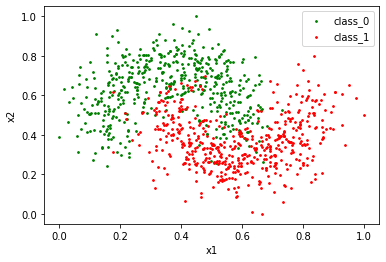

In [ ]:
plt.scatter(df.iloc[:,0][y==0], df.iloc[:,1][y==0], c='green',s=3,label='class_0')
plt.scatter(df.iloc[:,0][y==1], df.iloc[:,1][y==1], c='red',s=3,label='class_1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

### splitting of the dataset

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x)
print(y)

           x1        x2
0    0.330281  0.618231
1    0.644679  0.330863
2    0.527744  0.496734
3    0.353813  0.200870
4    0.191821  0.603786
..        ...       ...
995  0.558142  0.534053
996  0.317583  0.671125
997  0.758882  0.249481
998  0.133961  0.421643
999  0.536116  0.636812

[1000 rows x 2 columns]
0      1
1      1
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: y, Length: 1000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

700
300


## Train a simple decision tree classifier from sklearn and plot the decision boundary for the same.Perform hyperparameter tuning for finding the best value of max_depth of the decision tree.

[Text(0.5826416015625, 0.9666666666666667, 'X[1] <= 0.581\ngini = 0.5\nsamples = 700\nvalue = [359, 341]'), Text(0.212158203125, 0.9, 'X[0] <= 0.254\ngini = 0.396\nsamples = 434\nvalue = [118, 316]'), Text(0.03125, 0.8333333333333334, 'X[0] <= 0.217\ngini = 0.105\nsamples = 54\nvalue = [51, 3]'), Text(0.015625, 0.7666666666666667, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'), Text(0.046875, 0.7666666666666667, 'X[0] <= 0.22\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'), Text(0.03125, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.0625, 0.7, 'X[1] <= 0.384\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'), Text(0.046875, 0.6333333333333333, 'X[0] <= 0.234\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(0.03125, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.0625, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.078125, 0.6333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'), Text(0.39306640625, 0.8333333333333334, 'X[1] <= 0.383\n

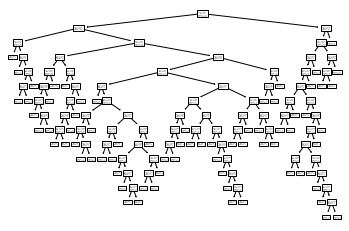

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier=DecisionTreeClassifier()
classifier=classifier.fit(x_train,y_train)
print(tree.plot_tree(classifier))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


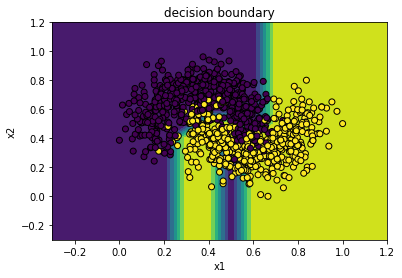

In [ ]:
from collections import Counter

def decision_boundary(x,y,clf,title_):
  x_min, x_max = x.iloc[:, 0].min() - 0.3, x.iloc[:, 0].max() + 0.3
  y_min, y_max = x.iloc[:, 1].min() - 0.3, x.iloc[:, 1].max() + 0.3
  xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))

  Z_train = clf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])

  Z_train = Z_train.reshape(xx_train.shape)
  plt.contourf(xx_train, yy_train, Z_train)
  #print(Counter(y))
  plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, edgecolor = 'k')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title_)
  plt.show()
decision_boundary(x,y,classifier,'decision boundary')

In [ ]:
y_train_pred=classifier.predict(x_train)
y_test_pred=classifier.predict(x_test)

In [ ]:
print('percentage accuracy of training dataset: ',metrics.accuracy_score(y_train, y_train_pred)*100)
print('percentage accuracy of testing dataset: ',metrics.accuracy_score(y_test, y_test_pred)*100)

percentage accuracy of training dataset:  100.0
percentage accuracy of testing dataset:  89.0


### hyperparameter tuning to find best value of max_depth

In [ ]:
from sklearn import metrics
maximum_depth={}
for i in range(1,15):
    classifier=DecisionTreeClassifier(max_depth=i)
    classifier=classifier.fit(x_train,y_train)
    y_test_pred=classifier.predict(x_test)
    maximum_depth[i]=metrics.accuracy_score(y_test, y_test_pred)
print(maximum_depth)
list_of_max_depth=list(maximum_depth.keys())
max=maximum_depth[list_of_max_depth[0]]
max_index=list_of_max_depth[0]
for i in list_of_max_depth:
  if(maximum_depth[i]>max):
    max=maximum_depth[i]
    max_index=i
print(max_index,max*100,"%")

{1: 0.7633333333333333, 2: 0.8733333333333333, 3: 0.8733333333333333, 4: 0.8666666666666667, 5: 0.8933333333333333, 6: 0.89, 7: 0.9033333333333333, 8: 0.89, 9: 0.8766666666666667, 10: 0.8933333333333333, 11: 0.89, 12: 0.8833333333333333, 13: 0.88, 14: 0.8833333333333333}
7 90.33333333333333 %


**Therefore, best_value for max_depth=7**

## Train a BaggingClassifier from sklearn, on the same dataset, and plot the decision boundary obtained. 

###training bagging classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
classifier2=BaggingClassifier(base_estimator=SVC())
classifier2.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC())

### plotting decision boundary of bagging classifier

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


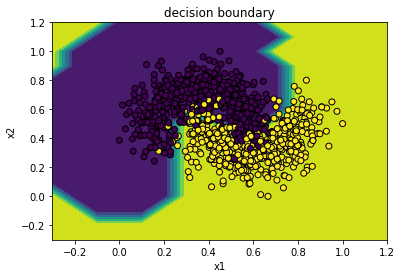

In [ ]:
decision_boundary(x,y,classifier2,'decision boundary')

### Accuracy metrics of bagging classfier

In [ ]:
y_train_pred=classifier2.predict(x_train)
y_test_pred=classifier2.predict(x_test)

In [ ]:
print('percentage accuracy of training dataset: ',metrics.accuracy_score(y_train, y_train_pred)*100)
print('percentage accuracy of testing dataset: ',metrics.accuracy_score(y_test, y_test_pred)*100)

percentage accuracy of training dataset:  90.71428571428571
percentage accuracy of testing dataset:  90.33333333333333


## Train a RandomForest classifier from sklearn and plot its decision boundary. Compare the models (all 3), their decision boundaries, and their accuracy metrics.

###training RandomForest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier()
classifier3=classifier3.fit(x_train,y_train)

### plotting decision boundary of RandomForest classifier

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


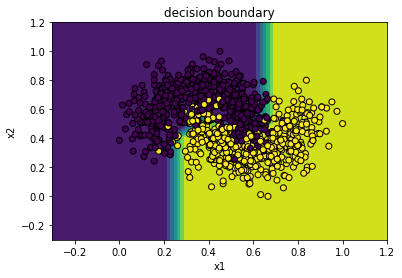

In [ ]:
decision_boundary(x,y,classifier3,'decision boundary')

### Accuracy metrics of RandomForest classfier

In [ ]:
y_train_pred=classifier3.predict(x_train)
y_test_pred=classifier3.predict(x_test)

In [ ]:
print('percentage accuracy of training dataset: ',metrics.accuracy_score(y_train, y_train_pred)*100)
print('percentage accuracy of testing dataset: ',metrics.accuracy_score(y_test, y_test_pred)*100)

percentage accuracy of training dataset:  100.0
percentage accuracy of testing dataset:  90.66666666666666


### comparing the models

**By comparing the models, we can see that overfitting is happening in the desion tree classifier model as the accuracy for the training set is 100% whereas the accuracy on testing data is low. On the other hand the testing accuracy for the baggingClassifier and the randomForestClassifier is better than the desiontreeClassifier. Hence, we can say that overfitting is less in these.Also, decision boundary is more even and smooth for baggingClassifier than random forest.**

## Vary the number of estimators for the BaggingClassifier and RandomForestClassifier, and comment on the obtained decision boundaries and their accuracies.

### BaggingClassifier




In [ ]:
import warnings
warnings.filterwarnings("ignore")

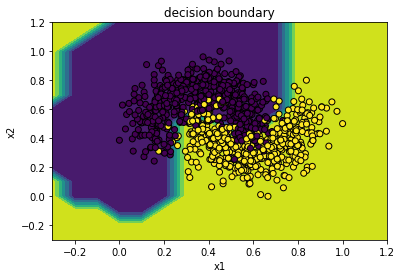

accuracy of testing data with 5  no. of estimators is:  90.66666666666666 %


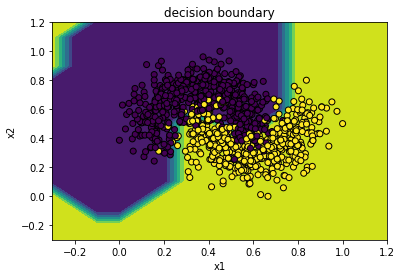

accuracy of testing data with 7  no. of estimators is:  91.0 %


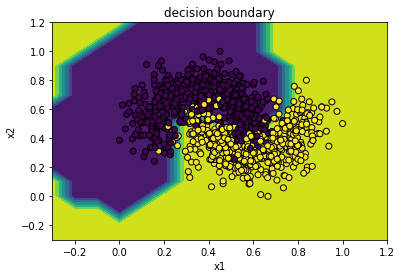

accuracy of testing data with 9  no. of estimators is:  90.66666666666666 %


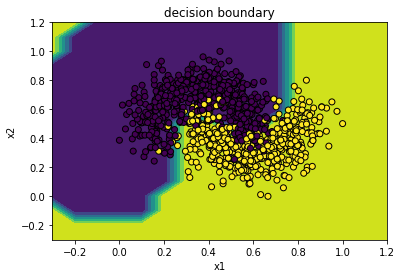

accuracy of testing data with 11  no. of estimators is:  90.66666666666666 %


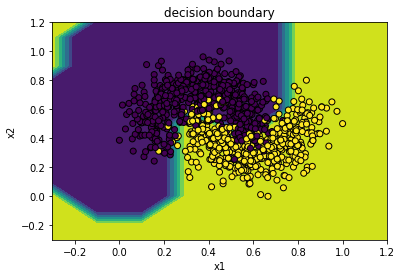

accuracy of testing data with 13  no. of estimators is:  90.33333333333333 %


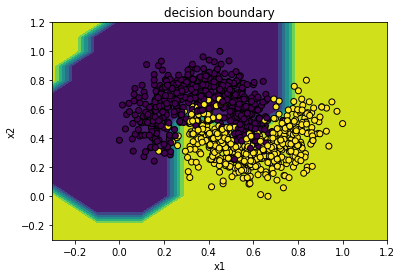

accuracy of testing data with 15  no. of estimators is:  90.66666666666666 %


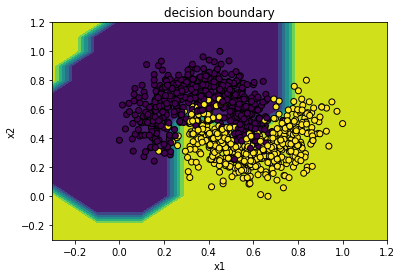

accuracy of testing data with 17  no. of estimators is:  90.33333333333333 %


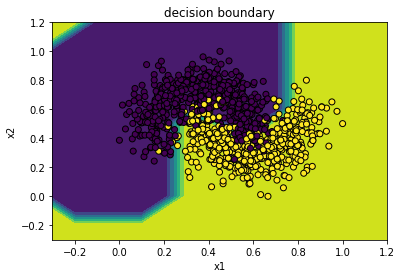

accuracy of testing data with 19  no. of estimators is:  90.66666666666666 %


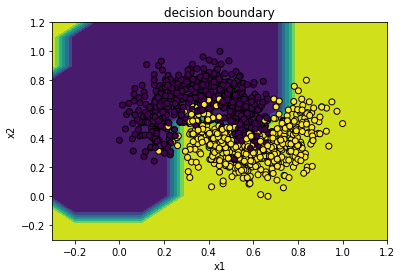

accuracy of testing data with 21  no. of estimators is:  90.66666666666666 %


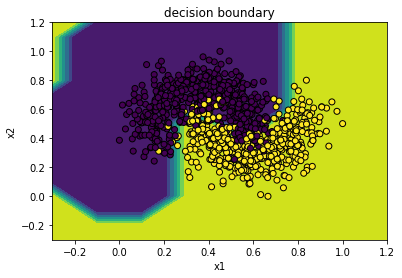

accuracy of testing data with 23  no. of estimators is:  90.66666666666666 %


In [ ]:
for i in range(5,25,2):
  classifier = BaggingClassifier(n_estimators = i,base_estimator=SVC())
  classifier=classifier.fit(x_train,y_train)
  plt.figure(i)
  (decision_boundary(x,y,classifier,'decision boundary'))
  plt.show()
  y_test_predicted=classifier.predict(x_test)
  print("accuracy of testing data with", i," no. of estimators is: ",metrics.accuracy_score(y_test, y_test_predicted)*100,"%")

**Therefore, the best accuracy we are getting is 91% for n_estimators=15 and the decision boundary we are getting is also fiiting nicely.**

### RandomForestClassifier

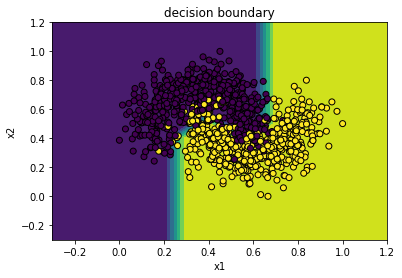

accuracy of testing data with 70  no. of estimators is:  91.0 %


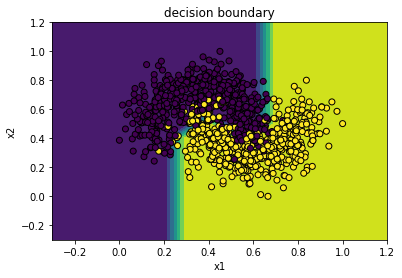

accuracy of testing data with 80  no. of estimators is:  91.33333333333333 %


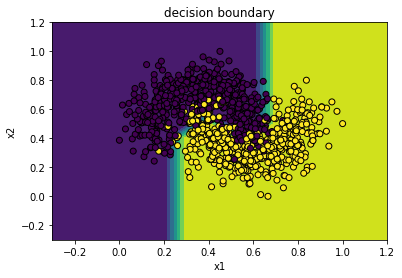

accuracy of testing data with 90  no. of estimators is:  91.0 %


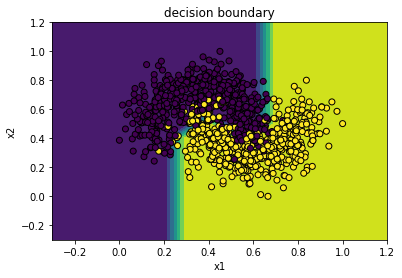

accuracy of testing data with 100  no. of estimators is:  91.33333333333333 %


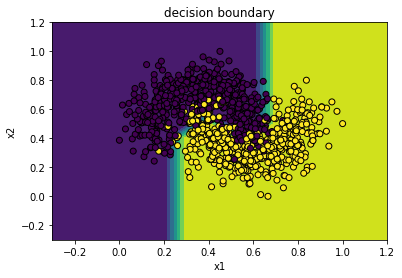

accuracy of testing data with 110  no. of estimators is:  91.33333333333333 %


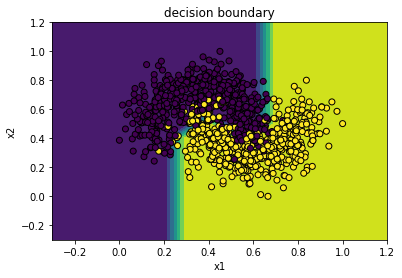

accuracy of testing data with 120  no. of estimators is:  91.66666666666666 %


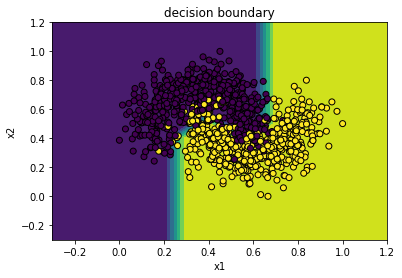

accuracy of testing data with 130  no. of estimators is:  91.0 %


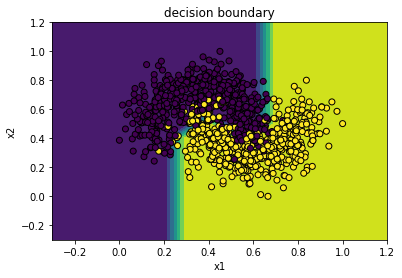

accuracy of testing data with 140  no. of estimators is:  91.33333333333333 %


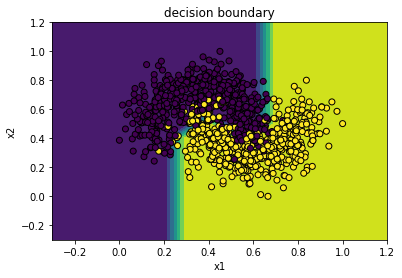

accuracy of testing data with 150  no. of estimators is:  92.0 %


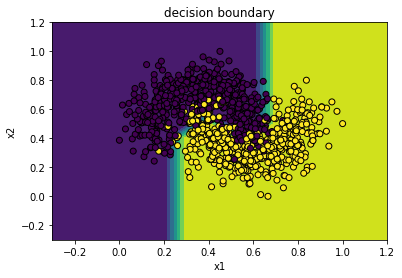

accuracy of testing data with 160  no. of estimators is:  91.66666666666666 %


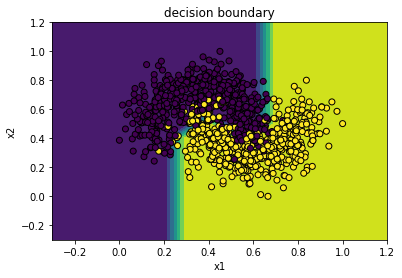

accuracy of testing data with 170  no. of estimators is:  91.33333333333333 %


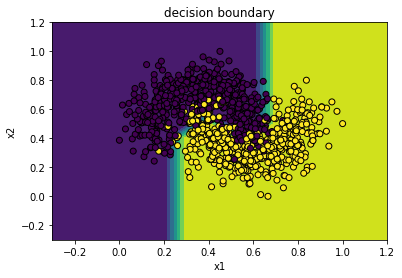

accuracy of testing data with 180  no. of estimators is:  91.66666666666666 %


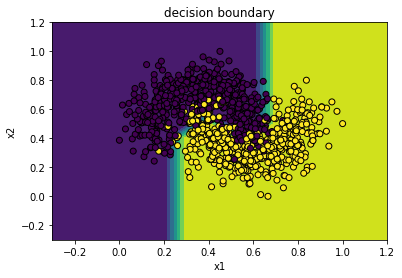

accuracy of testing data with 190  no. of estimators is:  91.66666666666666 %


In [ ]:
for i in range(70,200,10):
  classifier = RandomForestClassifier(n_estimators = i, random_state = 9)
  classifier=classifier.fit(x_train,y_train)
  plt.figure(i)
  (decision_boundary(x,y,classifier,'decision boundary'))
  plt.show()
  y_test_pred=classifier.predict(x_test)
  print("accuracy of testing data with",i," no. of estimators is: ",metrics.accuracy_score(y_test, y_test_pred)*100,"%")

**Therefore, the best accuracy we are getting is 92% for n_estimators=150 and the decision boundary we are getting is also fiiting nicely.**

**We are getting better accuracy for randomForestClassifier than BaggingClassifier. This is because Bagging algorithm uses all the features to decide the best split. On the other hand, the trees built in Random forest uses a random subset of the features at every node, to decide the best split.**

## 2.Implement a Bagging algorithm from scratch. [20 marks] Note: The code should be well commented and the role of each function should be mentionedclearly.Apply the above scratch bagging algorithm with n_estimators = 10, train it on the same dataset as above. Summarize how each of the separate trees performed (both numerically and visually).How do they perform on average?

In [ ]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
# making a class for bagging algorithm
class bagging:
   # defining constructor
   def __init__(self,df,df_train,n_estimators):
     self.df=df
     self.no_train=len(df_train)
     self.df_train=df_train
     self.n_estimators=n_estimators
     self.x_test=None
     self.y_test=None
     self.y_predicted=None
     self.classifiers=None
     self.predictions_y=None

   # creating random samples with replacement i.e creating bootstrap samples
   def create_d(self):
     d_sample=self.df_train.sample(n=self.no_train, random_state=9,replace=True)
     return d_sample

   # training a decisionTreeModel using a random sample 
   def classify(self):
     classifier=DecisionTreeClassifier()
     x_t=self.create_d().iloc[:,:-1]
     y_t=self.create_d().iloc[:,-1]
     classifier=classifier.fit(x_t,y_t)
     return classifier

   # training n_estimators to create an ensemble of decisionTrees
   def set_classify(self):
     l_classifiers=[]
     for i in range(self.n_estimators):
       l_classifiers.append(self.classify())
     return l_classifiers

   # predicting y for x_test by using every classifier and creating a list out of them
   def predict_set(self):
     l_prediction=[]
     l_classifiers_=self.set_classify()
     self.classifiers=l_classifiers_
     x_t=self.x_test
     for i in range(len(l_classifiers_)):
       y_p = (l_classifiers_[i].predict(x_t)).tolist()
       l_prediction.append(y_p)
     return l_prediction

   # using the ensemble Classifying new instance by majority vote.
   def predict_y(self,x_test):
     self.x_test=x_test
     l_prediction_=self.predict_set()
     self.predictions_y=l_prediction_
     predicted_y=[]
     for i in range(len(x_test)):
       c0=0
       c1=0
       for j in range(len(l_prediction_)):
         if(l_prediction_[j][i]==0):
           c0+=1
         else:
           c1+=1
       if(c0>c1):
         predicted_y.append(0)
       else:
         predicted_y.append(1)
     self.y_predicted=predicted_y
     return predicted_y

   # checking the performance of each tree both numerically(by accuracy score) and visually(by plotting decision_boundary)
   def performance(self,y_test):
     self.y_test=y_test
     for i in range(len(self.classifiers)):
        score=metrics.accuracy_score(self.y_test,self.predictions_y[i])
        plt.figure(i)
        decision_boundary(self.x_test,self.y_test,self.classifiers[i],"decision boundary for classfier")
        plt.show()
        print("accuracy score of DecisionTree",i,"is: ",score*100,"%")

   # checking average performance of the bagging algorithm
   def avg_performance(self):
     score=metrics.accuracy_score(self.y_test,self.y_predicted)
     print("average accuracy score of bagging is: ",score*100,"%")
    




In [ ]:
df

,x1,x2,y
0,0.330281,0.618231,1
1,0.644679,0.330863,1
2,0.527744,0.496734,1
3,0.353813,0.200870,1
4,0.191821,0.603786,0
...,...,...,...
995,0.558142,0.534053,0
996,0.317583,0.671125,0
997,0.758882,0.249481,1
998,0.133961,0.421643,0


In [ ]:
x_new=df.iloc[:,:-1]
y_new=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.30,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

700
300


In [ ]:
df_train=x_train
df_train['y']=y_train
df_train

,x1,x2,y
731,0.159301,0.651014,0
716,0.572034,0.770897,0
640,0.167504,0.448891,0
804,0.540557,0.405789,0
737,0.664733,0.532325,0
...,...,...,...
767,0.783469,0.758907,1
72,0.435795,0.301733,1
908,0.445353,0.319553,1
235,0.516343,0.431100,0


In [ ]:
bag=bagging(df,df_train,10)

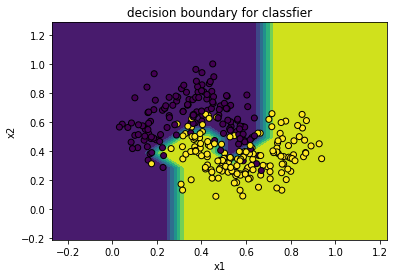

accuracy score of DecisionTree 0 is:  89.0 %


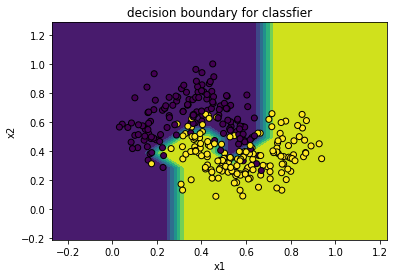

accuracy score of DecisionTree 1 is:  89.0 %


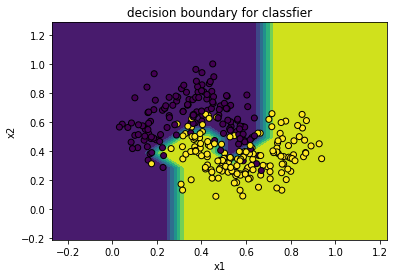

accuracy score of DecisionTree 2 is:  89.33333333333333 %


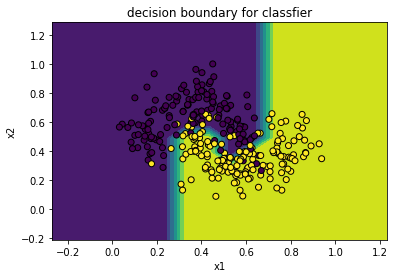

accuracy score of DecisionTree 3 is:  89.33333333333333 %


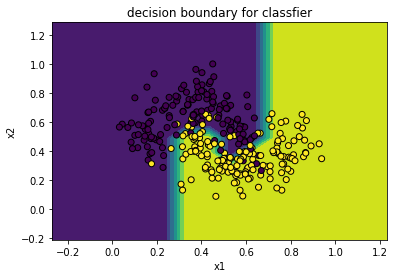

accuracy score of DecisionTree 4 is:  89.66666666666666 %


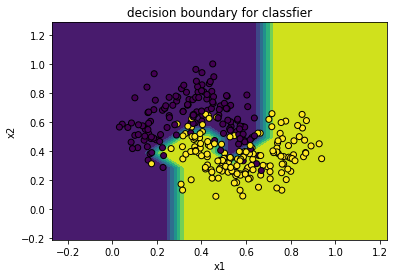

accuracy score of DecisionTree 5 is:  89.33333333333333 %


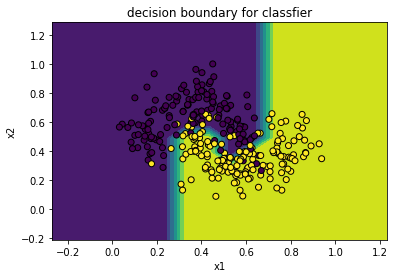

accuracy score of DecisionTree 6 is:  89.66666666666666 %


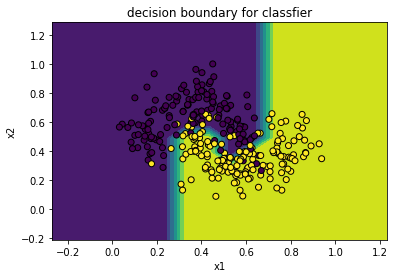

accuracy score of DecisionTree 7 is:  89.33333333333333 %


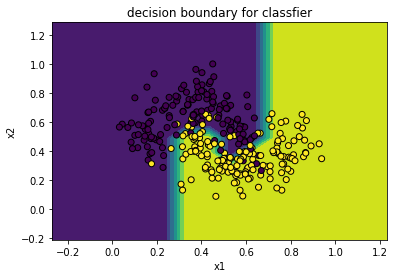

accuracy score of DecisionTree 8 is:  89.66666666666666 %


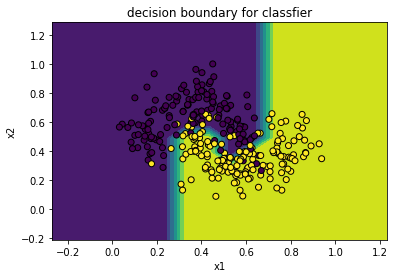

accuracy score of DecisionTree 9 is:  89.66666666666666 %


In [ ]:
y_p=bag.predict_y(x_test)
bag.performance(y_test)

In [ ]:
bag.avg_performance()

average accuracy score of bagging is:  89.66666666666666 %


#**Question 2:**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset=df
dataset

,x1,x2,y
0,0.330281,0.618231,1
1,0.644679,0.330863,1
2,0.527744,0.496734,1
3,0.353813,0.200870,1
4,0.191821,0.603786,0
...,...,...,...
995,0.558142,0.534053,0
996,0.317583,0.671125,0
997,0.758882,0.249481,1
998,0.133961,0.421643,0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

700
300


## 1.Train a AdaBoost Model.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
classifierAd = AdaBoostClassifier()
classifierAd = classifierAd.fit(x_train, y_train)

In [ ]:
y_pred_train_Ada = classifierAd.predict(x_train)
y_pred_test_Ada = classifierAd.predict(x_test)

##2.Train a XGBoost Model in which subsample=0.7

In [ ]:
from xgboost import XGBClassifier
classifierXg= XGBClassifier(subsample=0.7)
classifierXg=classifierXg.fit(x_train.values, y_train.values)

In [ ]:
y_pred_train_Xg = classifierXg.predict(x_train.values)
y_pred_test_Xg = classifierXg.predict(x_test.values)

##3.Print the accuracy on the training set and test set.


### for AdaBoost model

In [ ]:
print("Accuracy of the AdaBoost model on the train dataset: ",metrics.accuracy_score(y_train, y_pred_train_Ada))
print("Accuracy of the AdaBoost model on the test dataset: ",metrics.accuracy_score(y_test, y_pred_test_Ada))

Accuracy of the AdaBoost model on the train dataset:  0.9442857142857143
Accuracy of the AdaBoost model on the test dataset:  0.89


### for XgBoost model

In [ ]:
print("Accuracy of the XgBoost model on the train dataset: ",metrics.accuracy_score(y_train, y_pred_train_Xg))
print("Accuracy of the XgBoost model on the test dataset: ",metrics.accuracy_score(y_test, y_pred_test_Xg))

Accuracy of the XgBoost model on the train dataset:  0.9942857142857143
Accuracy of the XgBoost model on the test dataset:  0.9033333333333333


##4.Train a LightGBM model and choose different values for num_leaves

In [ ]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier()
classifier_lgbm=classifier_lgbm.fit(x_train, y_train)

In [ ]:
y_pred_test_gbm=classifier_lgbm.predict(x_test)
print("Accuracy of the Lightgbm model on the test dataset: ",metrics.accuracy_score(y_test, y_pred_test_gbm))

Accuracy of the Lightgbm model on the test dataset:  0.8966666666666666


### Parameter Tuning for num_leaves

In [ ]:
def best_Num_leaves():
  d={}
  for i in range(2,40,1):
    classifier_lg = LGBMClassifier(num_leaves=i)
    classifier_lg=classifier_lg.fit(x_train, y_train)
    y_pred_test_lg=classifier_lg.predict(x_test)
    d[i]=metrics.accuracy_score(y_test, y_pred_test_lg)
    accuracies = list(d.values())
    max_acc=accuracies[0]
    for i in range(len(accuracies)):
      if(accuracies[i]>max_acc):
        max_acc=accuracies[i]
    k = list(d.keys())
    best_num_leaves=k[accuracies.index(max_acc)]
  return best_num_leaves,max_acc

best_Num_leaves()

(3, 0.92)

##5.Analyze the relation between max_depth and num_leaves, and check for which value the model starts overfitting.


For max_depth = 1 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 1 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 1 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 1 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 1 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 1 and num_leaves = 20
Accuracy of the lightgbm model on the train dat

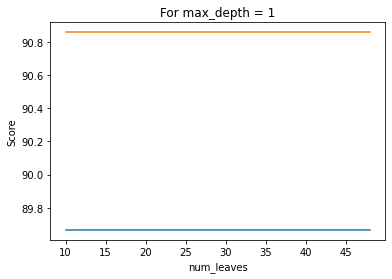

For max_depth = 3 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 3 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 3 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 3 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 3 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 3 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the te

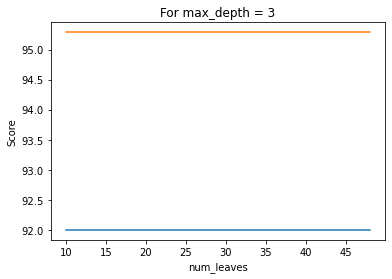

For max_depth = 5 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 95.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 5 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 96.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 5 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 5 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 96.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 5 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 5 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
A

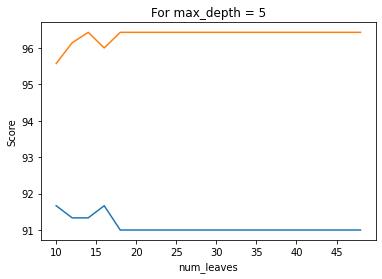

For max_depth = 7 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 7 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  90.66666666666666 %
For max_depth = 7 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 97.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 7 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 7 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
A

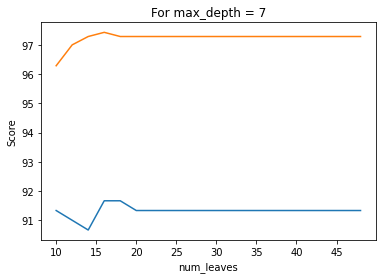

For max_depth = 9 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 9 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 9 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 97.85714285714285 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 9 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 97.85714285714285 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 9 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 9 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of th

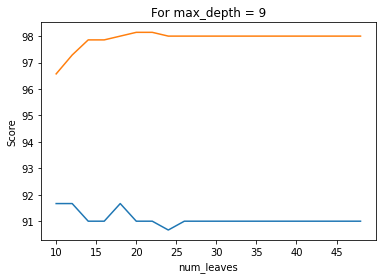

For max_depth = 11 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 11 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 11 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 97.71428571428571 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 11 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 11 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 98.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  90.66666666666666 %
For max_depth = 11 and num_leaves = 20
Accuracy of the lightgbm model on the tra

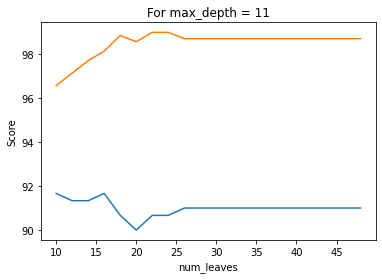

For max_depth = 13 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 13 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 13 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 13 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.57142857142858 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 13 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  90.33333333333333 %
For max_depth = 13 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.428571428571

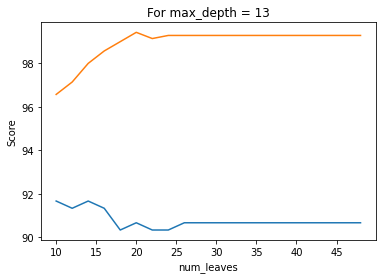

For max_depth = 15 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 15 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 15 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 15 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 15 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  90.66666666666666 %
For max_depth = 15 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.142857142857

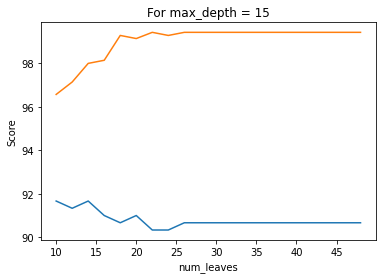

For max_depth = 17 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 17 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 17 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 17 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 17 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 17 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

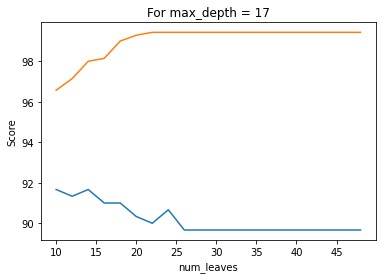

For max_depth = 19 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 19 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 19 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 19 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 19 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 19 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

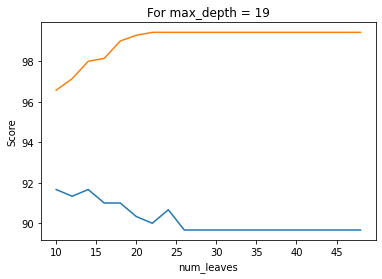

For max_depth = 21 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 21 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 21 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 21 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 21 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 21 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

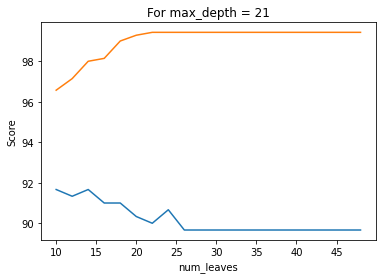

For max_depth = 23 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 23 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 23 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 23 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 23 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 23 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

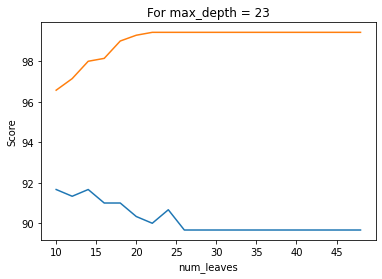

For max_depth = 25 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 25 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 25 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 25 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 25 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 25 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

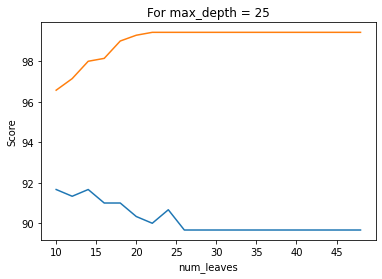

For max_depth = 27 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 27 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 27 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 27 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 27 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 27 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

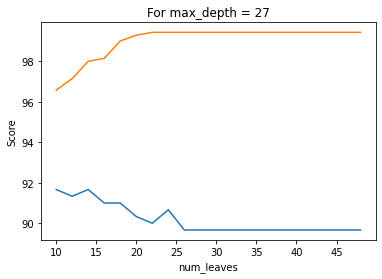

For max_depth = 29 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 29 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 29 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 29 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 29 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 29 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 99.28571428571429 %
Accuracy of the light

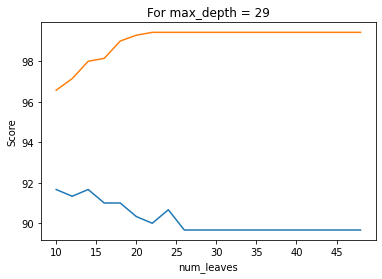

In [ ]:
for i in range(1,30,2):
  max_depth=i
  x=[]
  y=[]
  y2=[]
  for j in range(10,50,2):
    num_leaves=j
    model=LGBMClassifier(max_depth=max_depth,num_leaves=num_leaves)
    model.fit(x_train,y_train)
    print("For max_depth =",max_depth,"and num_leaves =",num_leaves)
    print("Accuracy of the lightgbm model on the train dataset",model.score(x_train,y_train)*100,'%')
    print("Accuracy of the lightgbm model on the test dataset: ",model.score(x_test,y_test)*100,'%')
    x.append(j)
    y.append(model.score(x_test,y_test)*100)
    y2.append(model.score(x_train,y_train)*100)
  plt.plot(x,y,label="Testing Score")
  plt.plot(x,y2,label="Training Score")
  plt.title("For max_depth = "+str(max_depth))
  plt.xlabel("num_leaves")
  plt.ylabel("Score")
  plt.show()

For max_depth = 1 and num_leaves = 2
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 2
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 5 and num_leaves = 2
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 7 and num_leaves = 2
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 9 and num_leaves = 2
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 11 and num_leaves = 2
Accuracy of the lightgbm model on the train dataset 

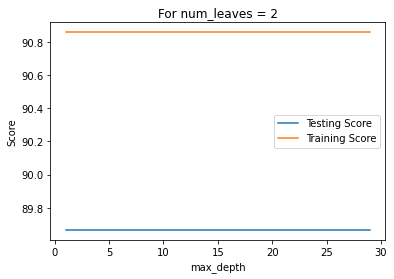

For max_depth = 1 and num_leaves = 4
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 4
Accuracy of the lightgbm model on the train dataset 94.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 5 and num_leaves = 4
Accuracy of the lightgbm model on the train dataset 94.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 7 and num_leaves = 4
Accuracy of the lightgbm model on the train dataset 94.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 9 and num_leaves = 4
Accuracy of the lightgbm model on the train dataset 94.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 11 and num_leaves = 4
Accuracy of the lightgbm model on the train dataset 

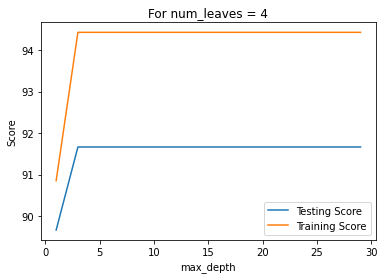

For max_depth = 1 and num_leaves = 6
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 6
Accuracy of the lightgbm model on the train dataset 94.71428571428572 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 6
Accuracy of the lightgbm model on the train dataset 94.71428571428572 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 7 and num_leaves = 6
Accuracy of the lightgbm model on the train dataset 94.71428571428572 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 9 and num_leaves = 6
Accuracy of the lightgbm model on the train dataset 94.71428571428572 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 11 and num_leaves = 6
Accuracy of the lightgbm model on the train dataset 94.71428571428572 %
Accuracy of the lightgbm model o

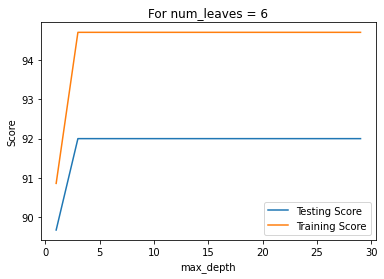

For max_depth = 1 and num_leaves = 8
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 8
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 8
Accuracy of the lightgbm model on the train dataset 94.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 7 and num_leaves = 8
Accuracy of the lightgbm model on the train dataset 95.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 9 and num_leaves = 8
Accuracy of the lightgbm model on the train dataset 95.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 11 and num_leaves = 8
Accuracy of the lightgbm model on the train dataset 95.42857142857143 %
Accuracy of the lig

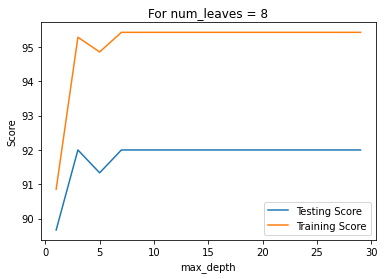

For max_depth = 1 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 95.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 7 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.57142857142857 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 11 and num_leaves = 10
Accuracy of the lightgbm model on the train dataset 96.5714

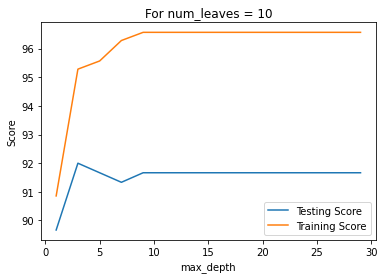

For max_depth = 1 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 96.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 7 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 9 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 11 and num_leaves = 12
Accuracy of the lightgbm model on the train dataset 97.14285714285714 %
Accuracy of t

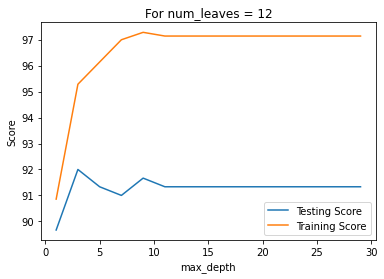

For max_depth = 1 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 7 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  90.66666666666666 %
For max_depth = 9 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 97.85714285714285 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 14
Accuracy of the lightgbm model on the train dataset 97.71428571428571 %


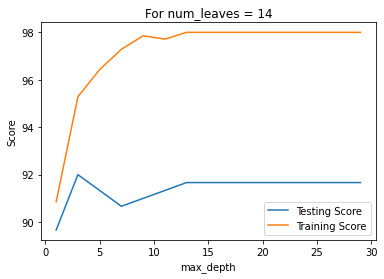

For max_depth = 1 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 96.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 7 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 97.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 9 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 97.85714285714285 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 16
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of t

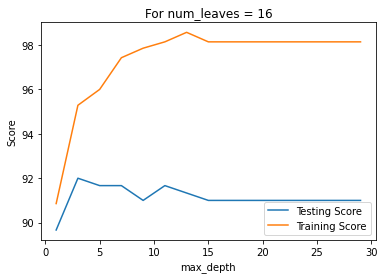

For max_depth = 1 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 9 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.66666666666666 %
For max_depth = 11 and num_leaves = 18
Accuracy of the lightgbm model on the train dataset 98.85714285714286 %
Accuracy of t

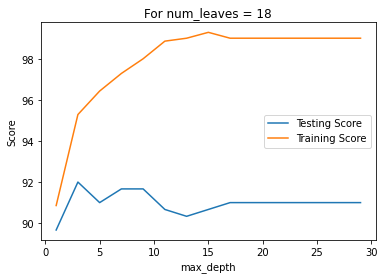

For max_depth = 1 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 20
Accuracy of the lightgbm model on the train dataset 98.57142857142858 %
Accuracy of t

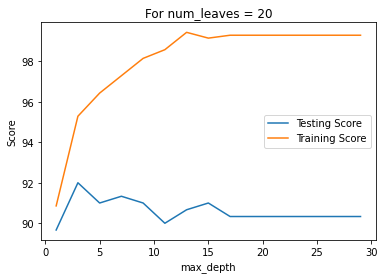

For max_depth = 1 and num_leaves = 22
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 22
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 22
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 22
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 22
Accuracy of the lightgbm model on the train dataset 98.14285714285714 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 22
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm m

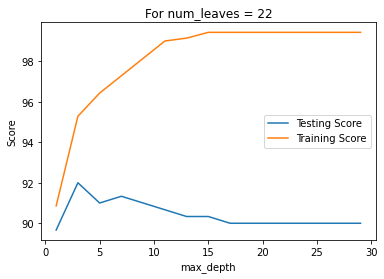

For max_depth = 1 and num_leaves = 24
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 24
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 24
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 24
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 24
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  90.66666666666666 %
For max_depth = 11 and num_leaves = 24
Accuracy of the lightgbm model on the train dataset 99.0 %
Accuracy of the lightgbm m

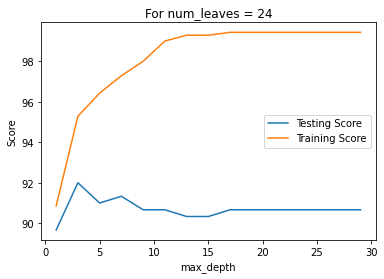

For max_depth = 1 and num_leaves = 26
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 26
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 26
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 26
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 26
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 26
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

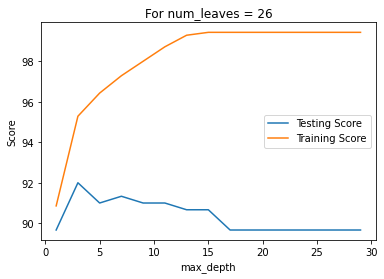

For max_depth = 1 and num_leaves = 28
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 28
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 28
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 28
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 28
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 28
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

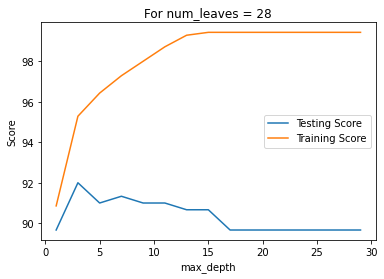

For max_depth = 1 and num_leaves = 30
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 30
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 30
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 30
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 30
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 30
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

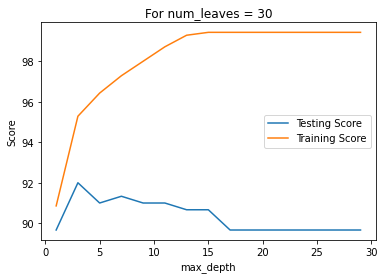

For max_depth = 1 and num_leaves = 32
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 32
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 32
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 32
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 32
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 32
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

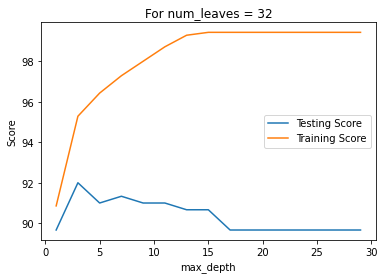

For max_depth = 1 and num_leaves = 34
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 34
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 34
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 34
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 34
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 34
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

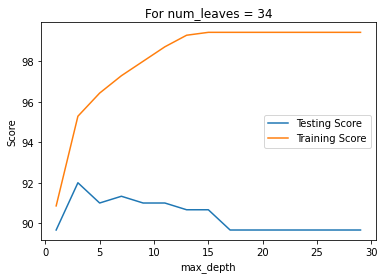

For max_depth = 1 and num_leaves = 36
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 36
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 36
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 36
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 36
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 36
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

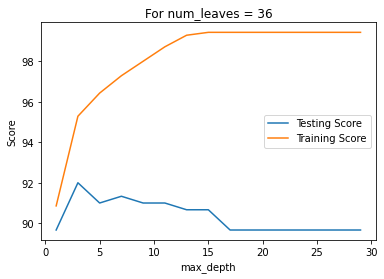

For max_depth = 1 and num_leaves = 38
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 38
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 38
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 38
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 38
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 38
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

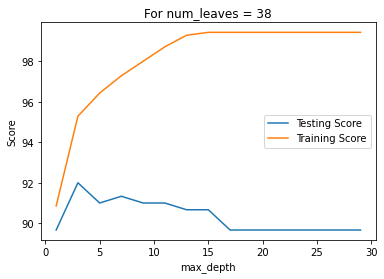

For max_depth = 1 and num_leaves = 40
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 40
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 40
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 40
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 40
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 40
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

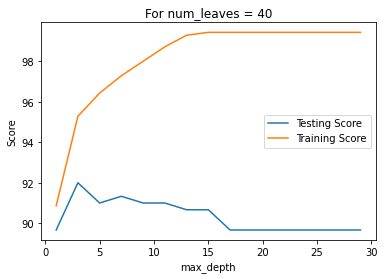

For max_depth = 1 and num_leaves = 42
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 42
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 42
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 42
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 42
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 42
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

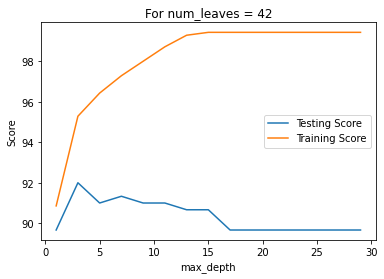

For max_depth = 1 and num_leaves = 44
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 44
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 44
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 44
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 44
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 44
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

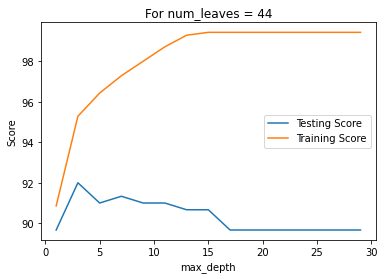

For max_depth = 1 and num_leaves = 46
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 46
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 46
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 46
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 46
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 46
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

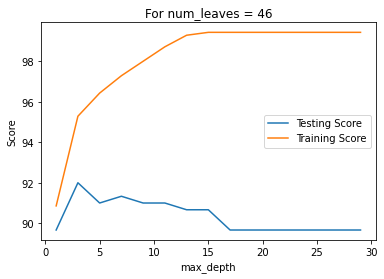

For max_depth = 1 and num_leaves = 48
Accuracy of the lightgbm model on the train dataset 90.85714285714286 %
Accuracy of the lightgbm model on the test dataset:  89.66666666666666 %
For max_depth = 3 and num_leaves = 48
Accuracy of the lightgbm model on the train dataset 95.28571428571428 %
Accuracy of the lightgbm model on the test dataset:  92.0 %
For max_depth = 5 and num_leaves = 48
Accuracy of the lightgbm model on the train dataset 96.42857142857143 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 7 and num_leaves = 48
Accuracy of the lightgbm model on the train dataset 97.28571428571429 %
Accuracy of the lightgbm model on the test dataset:  91.33333333333333 %
For max_depth = 9 and num_leaves = 48
Accuracy of the lightgbm model on the train dataset 98.0 %
Accuracy of the lightgbm model on the test dataset:  91.0 %
For max_depth = 11 and num_leaves = 48
Accuracy of the lightgbm model on the train dataset 98.71428571428571 %
Accuracy of the lightgbm m

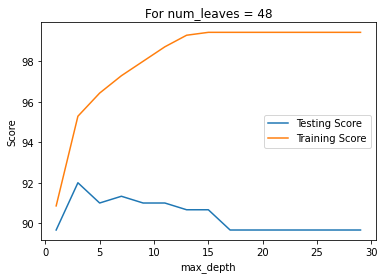

In [ ]:
for i in range(2,50,2):
  num_leaves=i
  x=[]
  y=[]
  y2=[]
  for j in range(1,30,2):
    max_depth=j
    model=LGBMClassifier(max_depth=max_depth,num_leaves=num_leaves)
    model.fit(x_train,y_train)
    print("For max_depth =",max_depth,"and num_leaves =",num_leaves)
    print("Accuracy of the lightgbm model on the train dataset",model.score(x_train,y_train)*100,'%')
    print("Accuracy of the lightgbm model on the test dataset: ",model.score(x_test,y_test)*100,'%')
    x.append(j)
    y.append(model.score(x_test,y_test)*100)
    y2.append(model.score(x_train,y_train)*100)
  plt.plot(x,y,label="Testing Score")
  plt.plot(x,y2,label="Training Score")
  plt.title("For num_leaves = "+str(num_leaves))
  plt.legend()
  plt.xlabel("max_depth")
  plt.ylabel("Score")
  plt.show()

## 6.Report which parameters can be used for better accuracy and also which parameter can be used for avoiding overfitting.

In [ ]:
best=[-100,0,0,0,0,0,0]
for max_depth in range(1,30,2):
  for num_leaves in range(2,30,2):
    for learning_rate in [0.1,0.05]:
      for reg_alpha in [0.1,1]:
        for reg_lambda in [0.1,1]:
          for n_estimators in [100,150,200]:
            model=LGBMClassifier(max_depth=max_depth,num_leaves=num_leaves,learning_rate=learning_rate,reg_alpha=reg_alpha,reg_lambda=reg_lambda,n_estimators=n_estimators)
            model.fit(x_train,y_train)
            score=model.score(x_test,y_test)*100
            if(score>best[0]):
              best[0]=score
              best[1]=max_depth
              best[2]=num_leaves
              best[3]=learning_rate
              best[4]=reg_alpha
              best[5]=reg_lambda
              best[6]=n_estimators

In [ ]:
print("The Best score comes out to be :",best[0])
print("Best max_depth =",best[1])
print("Best num_leaves =",best[2])
print("Best learning_rate =",best[3])
print("Best reg_alpha =",best[4])
print("Best reg_lambda =",best[5])
print("Best n_estimators =",best[6])

The Best score comes out to be : 92.66666666666666
Best max_depth = 3
Best num_leaves = 4
Best learning_rate = 0.05
Best reg_alpha = 0.1
Best reg_lambda = 0.1
Best n_estimators = 100


## 7.Plot the decision boundaries for all the 3 models and compare their performance.

###for adaBoost model

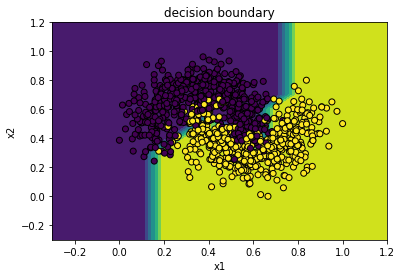

In [ ]:
decision_boundary(x,y,classifierAd,'decision boundary')

### for XgBoost model

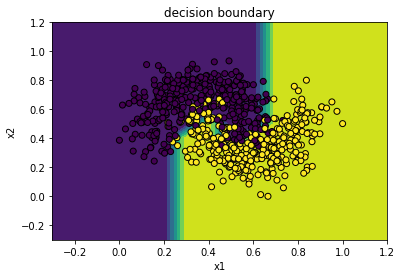

In [ ]:
decision_boundary(x_train,y_train,classifierXg,'decision boundary')

### for lightGBM model

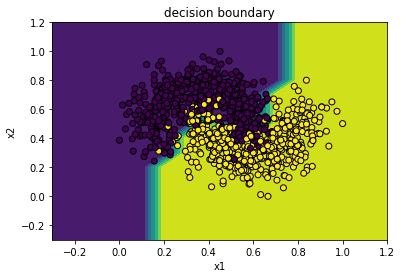

In [ ]:
decision_boundary(x,y,classifier_lgbm,'decision boundary')

#**Question 3:**

##Train a Bayes classification model on the above dataset, (using sklearn)(tune the hyperparameters accordingly)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb=classifier_nb.fit(x_train,y_train)
y_pred_test_nb=classifier_nb.predict(x_test)
y_pred_train_nb=classifier_nb.predict(x_train)

In [ ]:
print("Accuracy of the naive bayes model on the train dataset: ",metrics.accuracy_score(y_train, y_pred_train_nb))
print("Accuracy of the naive bayes model on the test dataset: ",metrics.accuracy_score(y_test, y_pred_test_nb))

Accuracy of the naive bayes model on the train dataset:  0.85
Accuracy of the naive bayes model on the test dataset:  0.86


In [ ]:
par=0
acc_max=0
var_smooth=np.logspace(0,-9,num=100)
for i in range(len(var_smooth)):
  classifier=GaussianNB(var_smoothing=var_smooth[i])
  classifier=classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=metrics.accuracy_score(y_test, y_pred)
  if(acc>acc_max):
    acc_max=acc
    par=var_smooth[i]
print("maximum accuracy is:",acc_max*100)
print("best value of var_smoothing for maximum accuracy:",par)

maximum accuracy is: 86.0
best value of var_smoothing for maximum accuracy: 0.04328761281083057


##From all the above trained models, choose any 3 models of your choice (which are giving good accuracy). Group them along with the trained Bayes Classification model, in a VotingClassifer from sklearn. Train the VotingClassfier again. And compare its performance with the models which were individually trained

In [ ]:
estimator = []
estimator.append(('naive_bayes',classifier_nb))
estimator.append(('XgBoost',classifierXg))
estimator.append(('AdaBoost',classifierAd))
estimator.append(('baggingClssifier',classifier2))


In [ ]:
from sklearn.ensemble import VotingClassifier
classifier_vot = VotingClassifier(estimators = estimator)
classifier_vot=classifier_vot.fit(x_train, y_train)
y_prediction_vot_test = classifier_vot.predict(x_test)
y_prediction_vot_train = classifier_vot.predict(x_train)

In [ ]:
print("Accuracy of the naive bayes model on the train dataset: ",metrics.accuracy_score(y_train, y_prediction_vot_train))
print("Accuracy of the naive bayes model on the test dataset: ",metrics.accuracy_score(y_test, y_prediction_vot_test))

Accuracy of the naive bayes model on the train dataset:  0.9271428571428572
Accuracy of the naive bayes model on the test dataset:  0.9033333333333333
